In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv('gdrive/My Drive/lifehack/final_heart_dataset.csv')
data.head()

,Unnamed: 0,Unnamed: 0.1,category,url,question
0,1896,1896,stroke,/komunitas/topic/terapi-bekam,Dok kalo pasien terkena stroke dan punya gangg...
1,1113,1113,stroke,/komunitas/topic/wanita-kebas-dikepala-sebelah...,"saya mau bertanya dok, ibu saya memiliki sakit..."
2,1812,1812,stroke,/komunitas/topic/sumbatan-stroke-iskemik,Selamat siang dok. Sudah setahun ini saya mend...
3,1558,1558,stroke,/komunitas/topic/stroke-64,Hallo dokter bpk saya berusia 69 tahun tersera...
4,1824,1824,stroke,/komunitas/topic/tidak-mampu-bicara-dan-berdir...,"Salam sehat,\nDok, ayah saya mengalami seranga..."


In [ ]:
# Start with loading all necessary libraries
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
% matplotlib inline

Unigram Wordcloud (whole data)

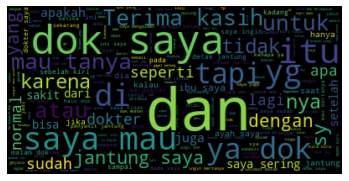

In [ ]:
def check_rev(review):
  if type(review) == str:
    return review
  else:
    return ''
text = " ".join(check_rev(review) for review in data.question)

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Bigram wordcloud (whole data)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[('saya mau', 471), ('ya dok', 381), ('mau tanya', 368), ('terima kasih', 366), ('dok saya', 318), ('jantung saya', 272), ('saya sering', 236), ('ibu saya', 216), ('ayah saya', 216), ('detak jantung', 181), ('sebelah kiri', 169), ('ke dokter', 168), ('saya ingin', 155), ('malam dok', 155), ('penyakit jantung', 155), ('sesak nafas', 147), ('ini saya', 143), ('kenapa ya', 141), ('kira kira', 140), ('saya sudah', 136), ('mau bertanya', 135), ('saya tidak', 135), ('serangan jantung', 127), ('apa ya', 126), ('dada saya', 126), ('halo dok', 120), ('saya mengalami', 119), ('selamat malam', 118), ('anak saya', 118), ('ingin bertanya', 116), ('tiba tiba', 115), ('saya juga', 113), ('apa yang', 108), ('dada sebelah', 106), ('dan saya', 104), ('pagi dok', 103), ('saat ini', 99), ('siang dok', 98), ('yang saya', 96), ('kiri saya', 95), ('dada kiri', 95), ('kasih dok', 92), ('saya merasa', 92), ('apa yg', 90), ('rumah sakit', 89), ('tidak ada', 89), ('tidak bisa', 86), ('nyeri dada', 86), ('di bagi

(-0.5, 1499.5, 999.5, -0.5)

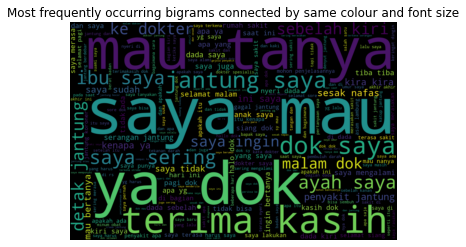

In [ ]:
import nltk
from wordcloud import WordCloud, STOPWORDS
import nltk
nltk.download('punkt')
nltk.download('wordnet')
import re
from sklearn import feature_extraction

WNL = nltk.WordNetLemmatizer()
def check_rev(review):
  if type(review) == str:
    return review
  else:
    return ''
text = " ".join(check_rev(review) for review in data.question)
# Lowercase and tokenize
text = text.lower()
# Remove single quote early since it causes problems with the tokenizer.
text = text.replace("'", "")
tokens = nltk.word_tokenize(text)
text1 = nltk.Text(tokens)

text_content = [word for word in text1]
# After the punctuation above is removed it still leaves empty entries in the list.
text_content = [s for s in text_content if len(s) != 0]


nltk_tokens = nltk.word_tokenize(text)  
bigrams_list = list(nltk.bigrams(text_content))
print(bigrams_list)
dictionary2 = [' '.join(tup) for tup in bigrams_list]
print (dictionary2)

#Using count vectoriser to view the frequency of bigrams
vectorizer = feature_extraction.text.CountVectorizer(ngram_range=(2, 3))
bag_of_words = vectorizer.fit_transform(dictionary2)
vectorizer.vocabulary_
sum_words = bag_of_words.sum(axis=0) 
words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
print (words_freq[:100])

#Generating wordcloud and saving as jpg image
words_dict = dict(words_freq)
WC_height = 1000
WC_width = 1500
WC_max_words = 200
wordCloud = WordCloud(max_words=WC_max_words, height=WC_height, width=WC_width)
wordCloud.generate_from_frequencies(words_dict)
plt.title('Most frequently occurring bigrams connected by same colour and font size')
plt.imshow(wordCloud, interpolation='bilinear')
plt.axis("off")

In [ ]:
words_freq

[('saya mau', 471),
 ('ya dok', 381),
 ('mau tanya', 368),
 ('terima kasih', 366),
 ('dok saya', 318),
 ('jantung saya', 272),
 ('saya sering', 236),
 ('ibu saya', 216),
 ('ayah saya', 216),
 ('detak jantung', 181),
 ('sebelah kiri', 169),
 ('ke dokter', 168),
 ('saya ingin', 155),
 ('malam dok', 155),
 ('penyakit jantung', 155),
 ('sesak nafas', 147),
 ('ini saya', 143),
 ('kenapa ya', 141),
 ('kira kira', 140),
 ('saya sudah', 136),
 ('mau bertanya', 135),
 ('saya tidak', 135),
 ('serangan jantung', 127),
 ('apa ya', 126),
 ('dada saya', 126),
 ('halo dok', 120),
 ('saya mengalami', 119),
 ('selamat malam', 118),
 ('anak saya', 118),
 ('ingin bertanya', 116),
 ('tiba tiba', 115),
 ('saya juga', 113),
 ('apa yang', 108),
 ('dada sebelah', 106),
 ('dan saya', 104),
 ('pagi dok', 103),
 ('saat ini', 99),
 ('siang dok', 98),
 ('yang saya', 96),
 ('kiri saya', 95),
 ('dada kiri', 95),
 ('kasih dok', 92),
 ('saya merasa', 92),
 ('apa yg', 90),
 ('rumah sakit', 89),
 ('tidak ada', 89),
 ('t

In [ ]:
delete = list(map(lambda x:x[0],words_freq[:5])) + ['assalamualaikum', 'saya mau bertanya', 'saya ingin bertanya', 'halo dokter', 'halo dok', 'terima kasih dokter', 'terima kasih dok', 'selamat pagi dokter', 'selamat pagi dok', 'selamat siang dokter', 'selamat siang dok', 'selamat malam dokter', 'selamat malam dok', 'pagi dokter', 'pagi dok', 'siang dokter', 'siang dok', 'malam dokter', 'malam dok', 'selamat pagi', 'selamat siang', 'selamat malam', 'saya ingin bertanya', 'dokter', 'dok', 'halo', 'bertanya', 'nanya', 'selamat sore dokter', 'selamat sore dok', 'selamat sore', 'sore dokter', 'sore dok', 'sore', 'assalamu\'alaikum', 'halo', 'hallo', 'tanya', 'ayah saya', 'ibu saya', 'anak saya', 'kenapa', 'mama saya', 'tante saya', 'papa saya', 'mohon maaf', 'maaf', 'salam sehat', 'salam']
delete 

['saya mau',
 'ya dok',
 'mau tanya',
 'terima kasih',
 'dok saya',
 'assalamualaikum',
 'saya mau bertanya',
 'saya ingin bertanya',
 'halo dokter',
 'halo dok',
 'terima kasih dokter',
 'terima kasih dok',
 'selamat pagi dokter',
 'selamat pagi dok',
 'selamat siang dokter',
 'selamat siang dok',
 'selamat malam dokter',
 'selamat malam dok',
 'pagi dokter',
 'pagi dok',
 'siang dokter',
 'siang dok',
 'malam dokter',
 'malam dok',
 'selamat pagi',
 'selamat siang',
 'selamat malam',
 'saya ingin bertanya',
 'dokter',
 'dok',
 'halo',
 'bertanya',
 'nanya',
 'selamat sore dokter',
 'selamat sore dok',
 'selamat sore',
 'sore dokter',
 'sore dok',
 'sore',
 "assalamu'alaikum",
 'halo',
 'hallo',
 'tanya',
 'ayah saya',
 'ibu saya',
 'anak saya',
 'kenapa',
 'mama saya',
 'tante saya',
 'papa saya',
 'mohon maaf',
 'maaf',
 'salam sehat',
 'salam']

In [ ]:
data

,Unnamed: 0,Unnamed: 0.1,category,url,question
0,1896,1896,stroke,/komunitas/topic/terapi-bekam,Dok kalo pasien terkena stroke dan punya gangg...
1,1113,1113,stroke,/komunitas/topic/wanita-kebas-dikepala-sebelah...,"saya mau bertanya dok, ibu saya memiliki sakit..."
2,1812,1812,stroke,/komunitas/topic/sumbatan-stroke-iskemik,Selamat siang dok. Sudah setahun ini saya mend...
3,1558,1558,stroke,/komunitas/topic/stroke-64,Hallo dokter bpk saya berusia 69 tahun tersera...
4,1824,1824,stroke,/komunitas/topic/tidak-mampu-bicara-dan-berdir...,"Salam sehat,\nDok, ayah saya mengalami seranga..."
...,...,...,...,...,...
1808,2821,2821,serangan-jantung,/komunitas/topic/nyeri-dada-6,"selamat pagi dok.\r\nsaya mau tanya, kenapa ya..."
1809,2822,2822,serangan-jantung,/komunitas/topic/apa-penyebab-sakit-kepala-dan...,"Assalam dok.. saya mau bertanya, saya biasa me..."
1810,2823,2823,serangan-jantung,/komunitas/topic/mengapa-jantung-sakit-dengan-...,Dok saya mau tanya.\r\nMengapa ya saya selalu ...
1811,2824,2824,serangan-jantung,/komunitas/topic/tentang-pernapasan,selamat sianv dok..\r\nsaya ada keluhan dada k...


In [ ]:
for word in delete:
  data['question'] = data['question'].apply(lambda x:x.lower() if type(x)==str else x).str.replace(word, '')
data.head(50)

,Unnamed: 0,Unnamed: 0.1,category,url,question
0,1896,1896,stroke,/komunitas/topic/terapi-bekam,kalo pasien terkena stroke dan punya gangguan...
1,1113,1113,stroke,/komunitas/topic/wanita-kebas-dikepala-sebelah...,"bertan, memiliki sakit kepala seperti kebas ..."
2,1812,1812,stroke,/komunitas/topic/sumbatan-stroke-iskemik,. sudah setahun ini saya menderita stroke peny...
3,1558,1558,stroke,/komunitas/topic/stroke-64,bpk saya berusia 69 tahun terserang stroke l...
4,1824,1824,stroke,/komunitas/topic/tidak-mampu-bicara-dan-berdir...,",\n, mengalami serangan stroke 2 tahun lalu y..."
5,1557,1557,stroke,/komunitas/topic/pengaruh-obat-antihipertensi-...,"sebelumn, apakah ada penggunaan off label dar..."
6,1202,1202,stroke,/komunitas/topic/stroke-107,saya stroke 10 des 2018 dirawat d rs 6 hari.ko...
7,1886,1886,stroke,/komunitas/topic/stroke-15,", stroke tapi sudh bisa di gerakkan smua angg..."
8,1731,1731,stroke,/komunitas/topic/cara-membersihkan-mulut,"selamar , cara membersihkan mulut yang mend..."
9,1052,1052,stroke,/komunitas/topic/snh,alomohon di bantu penjelasan hasil ct scan :t...


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[', gejala', 'gejala pembekakan', 'pembekakan jantung', 'jantung itu', 'itu seperti', 'seperti apa', 'apa ?', '? awalnya', 'awalnya saya', 'saya merasa', 'merasa jantung', 'jantung berdebar', 'berdebar dan', 'dan nyeri', 'nyeri dada', 'dada sebelah', 'sebelah kiri', 'kiri ,', ', sesak', 'sesak dan', 'dan dari', 'dari tangan', 'tangan sampai', 'sampai leher', 'leher pegel', "pegel ''", "'' setelah", 'setelah minum', 'minum obat', 'obat diet', 'diet ,', ', apa', 'apa itu', 'itu bisa', 'bisa jadi', 'jadi pembekakakn', 'pembekakakn jantung', 'jantung ?', '? karna', 'karna setelah', 'setelah cari', 'cari tahu', 'tahu dalam', 'dalam obat', 'obat diet', 'diet tersebut', 'tersebut mengandung', 'mengandung garcinia', 'garcinia cambogia', 'cambogia ingin', 'ingin ,', ', seb

(-0.5, 1499.5, 999.5, -0.5)

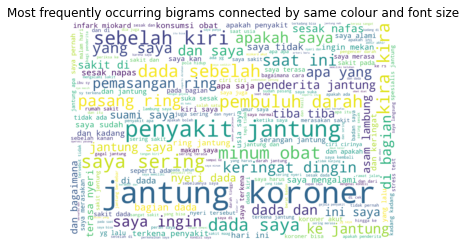

In [ ]:
import nltk
from wordcloud import WordCloud, STOPWORDS
import nltk
nltk.download('punkt')
nltk.download('wordnet')
import re
from sklearn import feature_extraction

WNL = nltk.WordNetLemmatizer()
def check_rev(review):
  if type(review) == str:
    return review
  else:
    return ''
text = " ".join(check_rev(review) for review in data[data['category']=='penyakit-jantung-koroner'].question)
# Lowercase and tokenize
text = text.lower()
# Remove single quote early since it causes problems with the tokenizer.
text = text.replace("'", "")
tokens = nltk.word_tokenize(text)
text1 = nltk.Text(tokens)

text_content = [word for word in text1]
# After the punctuation above is removed it still leaves empty entries in the list.
text_content = [s for s in text_content if len(s) != 0]

nltk_tokens = nltk.word_tokenize(text)  
#unigrams_list = list(nltk.unigrams(text_content))
bigrams_list = list(nltk.bigrams(text_content))
#print(bigrams_list)
dictionary2 = [' '.join(tup) for tup in bigrams_list]
print (dictionary2)

#Using count vectoriser to view the frequency of bigrams
vectorizer = feature_extraction.text.CountVectorizer(ngram_range=(2, 3))
bag_of_words = vectorizer.fit_transform(dictionary2)
vectorizer.vocabulary_
sum_words = bag_of_words.sum(axis=0) 
words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
print (words_freq[:100])

#Generating wordcloud and saving as jpg image
words_dict = dict(words_freq)
WC_height = 1000
WC_width = 1500
WC_max_words = 200
wordCloud = WordCloud(max_words=WC_max_words, height=WC_height, width=WC_width,background_color='white')
wordCloud.generate_from_frequencies(words_dict)
plt.title('Most frequently occurring bigrams connected by same colour and font size')
plt.imshow(wordCloud, interpolation='bilinear')
plt.axis("off")

In [ ]:
import nltk
from wordcloud import WordCloud, STOPWORDS
import nltk
nltk.download('punkt')
nltk.download('wordnet')
import re
from sklearn import feature_extraction

WNL = nltk.WordNetLemmatizer()
def check_rev(review):
  if type(review) == str:
    return review
  else:
    return ''
text = " ".join(check_rev(review) for review in data[data['category']=='penyakit-jantung-koroner'].question)
# Lowercase and tokenize
text = text.lower()
# Remove single quote early since it causes problems with the tokenizer.
text = text.replace("'", "")
tokens = nltk.word_tokenize(text)
text1 = nltk.Text(tokens)

text_content = [word for word in text1]
# After the punctuation above is removed it still leaves empty entries in the list.
text_content = [s for s in text_content if len(s) != 0]

nltk_tokens = nltk.word_tokenize(text)  
#unigrams_list = list(nltk.unigrams(text_content))
bigrams_list = list(nltk.bigrams(text_content))
#print(bigrams_list)
dictionary2 = [' '.join(tup) for tup in bigrams_list]
print (dictionary2)

#Using count vectoriser to view the frequency of bigrams
vectorizer = feature_extraction.text.CountVectorizer(ngram_range=(2, 3))
bag_of_words = vectorizer.fit_transform(dictionary2)
vectorizer.vocabulary_
sum_words = bag_of_words.sum(axis=0) 
words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
print (words_freq[:100])

#Generating wordcloud and saving as jpg image
words_dict = dict(words_freq)
WC_height = 1000
WC_width = 1500
WC_max_words = 200
wordCloud = WordCloud(max_words=WC_max_words, height=WC_height, width=WC_width,background_color='white')
wordCloud.generate_from_frequencies(words_dict)
plt.title('Most frequently occurring bigrams connected by same colour and font size')
plt.imshow(wordCloud, interpolation='bilinear')
plt.axis("off")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[', orang', 'orang tua', 'tua saya', 'saya 2', '2 tahun', 'tahun yang', 'yang lalu', 'lalu masuk', 'masuk rumah', 'rumah sakit', 'sakit dan', 'dan di', 'di diagnosa', 'diagnosa sakit', 'sakit penyempitan', 'penyempitan katup', 'katup jantung', 'jantung ,', ', saran', 'saran harus', 'harus dilakukan', 'dilakukan operasi', 'operasi ,', ', yang', 'yang ingin', 'ingin saya', 'saya kan', 'kan apakah', 'apakah dengan', 'dengan minum', 'minum obat', 'obat secara', 'secara teratur', 'teratur penyakit', 'penyakit akan', 'akan sembuh', 'sembuh atau', 'atau memang', 'memang hanya', 'hanya operasi', 'operasi jalan', 'jalan satu2nya', 'satu2nya untuk', 'untuk sembuh', 'sembuh ?', '? dan', 'dan apabila', 'apabila harus', 'harus di', 'di operasi', 'operasi bagaimana', 'bagaimana

(-0.5, 1499.5, 999.5, -0.5)

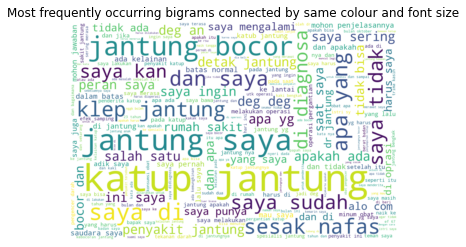

In [ ]:
import nltk
from wordcloud import WordCloud, STOPWORDS
import nltk
nltk.download('punkt')
nltk.download('wordnet')
import re
from sklearn import feature_extraction

WNL = nltk.WordNetLemmatizer()
def check_rev(review):
  if type(review) == str:
    return review
  else:
    return ''
text = " ".join(check_rev(review) for review in data[data['category']=='penyakit-katup-jantung'].question)
# Lowercase and tokenize
text = text.lower()
# Remove single quote early since it causes problems with the tokenizer.
text = text.replace("'", "")
tokens = nltk.word_tokenize(text)
text1 = nltk.Text(tokens)

text_content = [word for word in text1]
# After the punctuation above is removed it still leaves empty entries in the list.
text_content = [s for s in text_content if len(s) != 0]

nltk_tokens = nltk.word_tokenize(text)  
#unigrams_list = list(nltk.unigrams(text_content))
bigrams_list = list(nltk.bigrams(text_content))
#print(bigrams_list)
dictionary2 = [' '.join(tup) for tup in bigrams_list]
print (dictionary2)

#Using count vectoriser to view the frequency of bigrams
vectorizer = feature_extraction.text.CountVectorizer(ngram_range=(2, 3))
bag_of_words = vectorizer.fit_transform(dictionary2)
vectorizer.vocabulary_
sum_words = bag_of_words.sum(axis=0) 
words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
print (words_freq[:100])

#Generating wordcloud and saving as jpg image
words_dict = dict(words_freq)
WC_height = 1000
WC_width = 1500
WC_max_words = 200
wordCloud = WordCloud(max_words=WC_max_words, height=WC_height, width=WC_width,background_color='white')
wordCloud.generate_from_frequencies(words_dict)
plt.title('Most frequently occurring bigrams connected by same colour and font size')
plt.imshow(wordCloud, interpolation='bilinear')
plt.axis("off")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[', jika', 'jika dada', 'dada berdebar-debar', 'berdebar-debar dan', 'dan hasil', 'hasil pemeriksaan', 'pemeriksaan fisik', 'fisik jantung', 'jantung membesar', 'membesar itu', 'itu masuk', 'masuk ke', 'ke diagnosa', 'diagnosa penurunan', 'penurunan curah', 'curah jantung', 'jantung bukan', 'bukan ya', 'ya ?', '? sakit', 'sakit nyeri', 'nyeri dada', 'dada sebelah', 'sebelah kiri', 'kiri disertai', 'disertai tangan', 'tangan dingin', 'dingin hingga', 'hingga kuku', 'kuku berwarna', 'berwarna biru', 'biru .', '. berapa', 'berapa kali', 'kali rasa', 'rasa seperti', 'seperti jantung', 'jantung terhentak', 'terhentak .', '. ingin', 'ingin ,', ', masuk', 'masuk icu', 'icu 3', '3 bulan', 'bulan yang', 'yang lalu', 'lalu ,', ', diagnosis', 'diagnosis awal', 'awal menyatak

(-0.5, 1499.5, 999.5, -0.5)

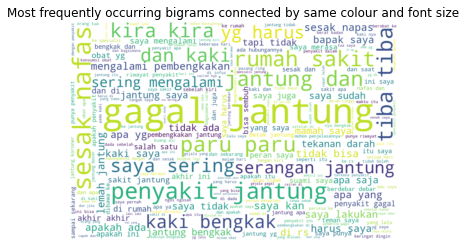

In [ ]:
import nltk
from wordcloud import WordCloud, STOPWORDS
import nltk
nltk.download('punkt')
nltk.download('wordnet')
import re
from sklearn import feature_extraction

WNL = nltk.WordNetLemmatizer()
def check_rev(review):
  if type(review) == str:
    return review
  else:
    return ''
text = " ".join(check_rev(review) for review in data[data['category']=='gagal-jantung'].question)
# Lowercase and tokenize
text = text.lower()
# Remove single quote early since it causes problems with the tokenizer.
text = text.replace("'", "")
tokens = nltk.word_tokenize(text)
text1 = nltk.Text(tokens)

text_content = [word for word in text1]
# After the punctuation above is removed it still leaves empty entries in the list.
text_content = [s for s in text_content if len(s) != 0]

nltk_tokens = nltk.word_tokenize(text)  
#unigrams_list = list(nltk.unigrams(text_content))
bigrams_list = list(nltk.bigrams(text_content))
#print(bigrams_list)
dictionary2 = [' '.join(tup) for tup in bigrams_list]
print (dictionary2)

#Using count vectoriser to view the frequency of bigrams
vectorizer = feature_extraction.text.CountVectorizer(ngram_range=(2, 3))
bag_of_words = vectorizer.fit_transform(dictionary2)
vectorizer.vocabulary_
sum_words = bag_of_words.sum(axis=0) 
words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
print (words_freq[:100])

#Generating wordcloud and saving as jpg image
words_dict = dict(words_freq)
WC_height = 1000
WC_width = 1500
WC_max_words = 200
wordCloud = WordCloud(max_words=WC_max_words, height=WC_height, width=WC_width,background_color='white')
wordCloud.generate_from_frequencies(words_dict)
plt.title('Most frequently occurring bigrams connected by same colour and font size')
plt.imshow(wordCloud, interpolation='bilinear')
plt.axis("off")

In [ ]:
data.to_csv('gdrive/My Drive/lifehack/smoga_ngaruh2.csv')